In [1]:
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd
import numpy as np

c:\Users\Tim\OneDrive\Dokumente\09_DHBW\5. Semester\02_Intelligence Engineering\bert\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Hugging Face dataset and convert to pandas
hf_ds = load_dataset("Tobi-Bueck/customer-support-tickets")
df = hf_ds["train"].to_pandas()

IT_QUEUES = [
    "Technical Support",
    "IT Support",
    "Product Support",
    "IT & Technology/Hardware Support",
    "IT & Technology/Software Development",
    "IT & Technology/Security Operations",
    "IT & Technology/Network Infrastructure",
    "Service Outages and Maintenance",
]

In [3]:
df = df[df["queue"].isin(IT_QUEUES)].reset_index(drop=True)
df = df[["subject", "body", "type", "queue", "priority"]]

In [4]:

df["queue"] = df["queue"].replace(
    to_replace=r"^IT & Technology/.*",
    value="IT & Technology",
    regex=True
)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32005 entries, 0 to 32004
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   28701 non-null  object
 1   body      32003 non-null  object
 2   type      30783 non-null  object
 3   queue     32005 non-null  object
 4   priority  32005 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [6]:
df['type'].value_counts()

type
Incident    14358
Problem      6733
Request      6351
Change       3341
Name: count, dtype: int64

In [7]:
df['queue'].value_counts()

queue
Technical Support                  14186
Product Support                     8960
IT Support                          5725
Service Outages and Maintenance     1912
IT & Technology                     1222
Name: count, dtype: int64

In [8]:
df['priority'].value_counts()


priority
high        15385
medium      11845
low          4436
very_low      171
critical      168
Name: count, dtype: int64

In [1]:
print((171 + 168)/(15285 + 11845 + 4436 + 171 + 168))

0.010625293841090738


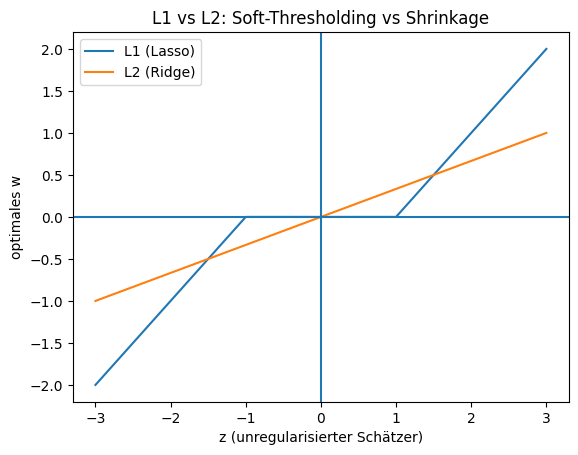

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-3, 3, 400)
lam = 1.0

# L1 (Soft-thresholding)
w_l1 = np.sign(z) * np.maximum(np.abs(z) - lam, 0)

# L2 (Shrinkage)
w_l2 = z / (1 + 2 * lam)

plt.figure()
plt.plot(z, w_l1, label="L1 (Lasso)")
plt.plot(z, w_l2, label="L2 (Ridge)")
plt.axhline(0)
plt.axvline(0)
plt.xlabel("z (unregularisierter Schätzer)")
plt.ylabel("optimales w")
plt.legend()
plt.title("L1 vs L2: Soft-Thresholding vs Shrinkage")
plt.show()
